In [2]:
import os
import numpy as np
from Bio.PDB import PDBParser
from tqdm import tqdm
import argparse
from tqdm import tqdm
import json




def average_bfactor(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('pdb_structure', pdb_file)
    # Initialize a count for residues
    num_residues = 0

    # Iterate through each model in the structure
    for model in structure:
        # Iterate through each chain in the model
        for chain in model:
            # Add the number of residues in this chain to the total count
            num_residues += len(list(chain.get_residues()))
    
    bfactor_values = [atom.get_bfactor() for atom in structure.get_atoms() if atom.get_bfactor() is not None]
    if bfactor_values:
        return np.mean(bfactor_values),num_residues
    else:
        return None,None

def process_pdb_folder(folder_path):    
    results = []
    file_list = [filename for filename in os.listdir(folder_path) if filename.endswith('.pdb')]
    with tqdm(total=len(file_list), desc="Processing files") as pbar:
        for filename in file_list:
            pdb_file = os.path.join(folder_path, filename)
            average,siz = average_bfactor(pdb_file)
            pbar.update(1)
            if siz >=50 and siz <= 100:
                results.append(average)
    
    # Calculate overall average
    overall_average = np.mean(results)
    print(f"\nOverall average B-factor: {overall_average:.2f}")
    return results
    # print(f"\nOverall average B-factor: {overall_average:.2f}")
    # # Save the updated JSON file
    # with open(out_file, 'w') as f:
    #     json.dump(output, f)




In [3]:
results = process_pdb_folder("extras/swiss_prot_pdbs/")


Processing files: 100%|██████████| 104644/104644 [35:30<00:00, 49.11it/s]


Overall average B-factor: 85.74


42489


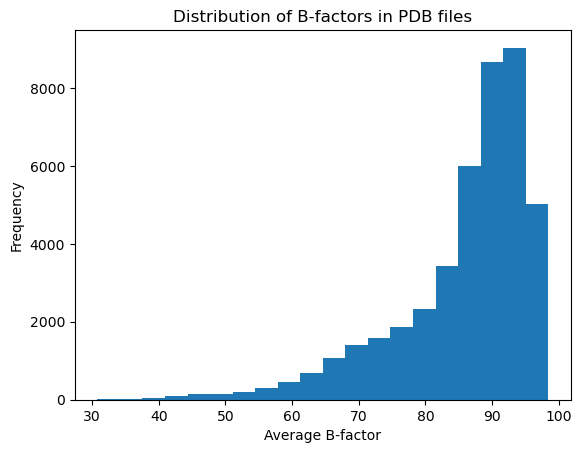

In [4]:
print(len(results))
# make a histogram
import matplotlib.pyplot as plt
plt.hist(results, bins=20)
plt.xlabel('Average B-factor')
plt.ylabel('Frequency')
plt.title('Distribution of B-factors in PDB files')

plt.show()

In [11]:
count = 0
for i in results:
    if i >= 70:
        count += 1
print(count)

38595
